In [95]:
# Objective:
# Predict house prices using property features such as area, bedrooms,
# bathrooms, and furnishing status.

# We will:
# • Load dataset
# • Explore data
# • Preprocess features
# • Train Linear Regression model
# • Evaluate using MAE and RMSE
# • Visualize results

In [96]:
# Definition:
# Libraries are prewritten modules that provide functions required for data analysis,
# visualization, and machine learning.

# For data manipulation and analysis
import pandas as pd
# For numerical operations
import numpy as np
# For advanced data visualization
import seaborn as sns
# For plotting graphs
import matplotlib.pyplot as plt

# Machine Learning libraries
# To split the dataset
from sklearn.model_selection import train_test_split
# Linear Regression model
from sklearn.linear_model import LinearRegression
# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [97]:
# Google Drive mounting allows Colab to access files stored in your drive.

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
# Definition:
# read_csv() loads dataset from CSV file into a DataFrame.

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Housing.csv')

# Display first 5 rows
print("First 5 rows of dataset:")
display(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [98]:
# shape returns number of rows and columns in dataset.

print("Dataset Shape:", data.shape)

# Display column names
print("\nColumn Names:")
for col in data.columns:
    print(col)

Dataset Shape: (545, 13)

Column Names:
price
area
bedrooms
bathrooms
stories
mainroad
guestroom
basement
hotwaterheating
airconditioning
parking
prefarea
furnishingstatus


In [99]:
# info() provides summary including column names, data types, and missing values.

print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [100]:
# describe() provides statistical summary such as mean, min, max, std deviation.

print("\nStatistical Summary:")
display(data.describe())


Statistical Summary:


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [101]:
# isnull().sum() checks for missing values in each column.

print("\nMissing Values in Dataset:")
print(data.isnull().sum())


Missing Values in Dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


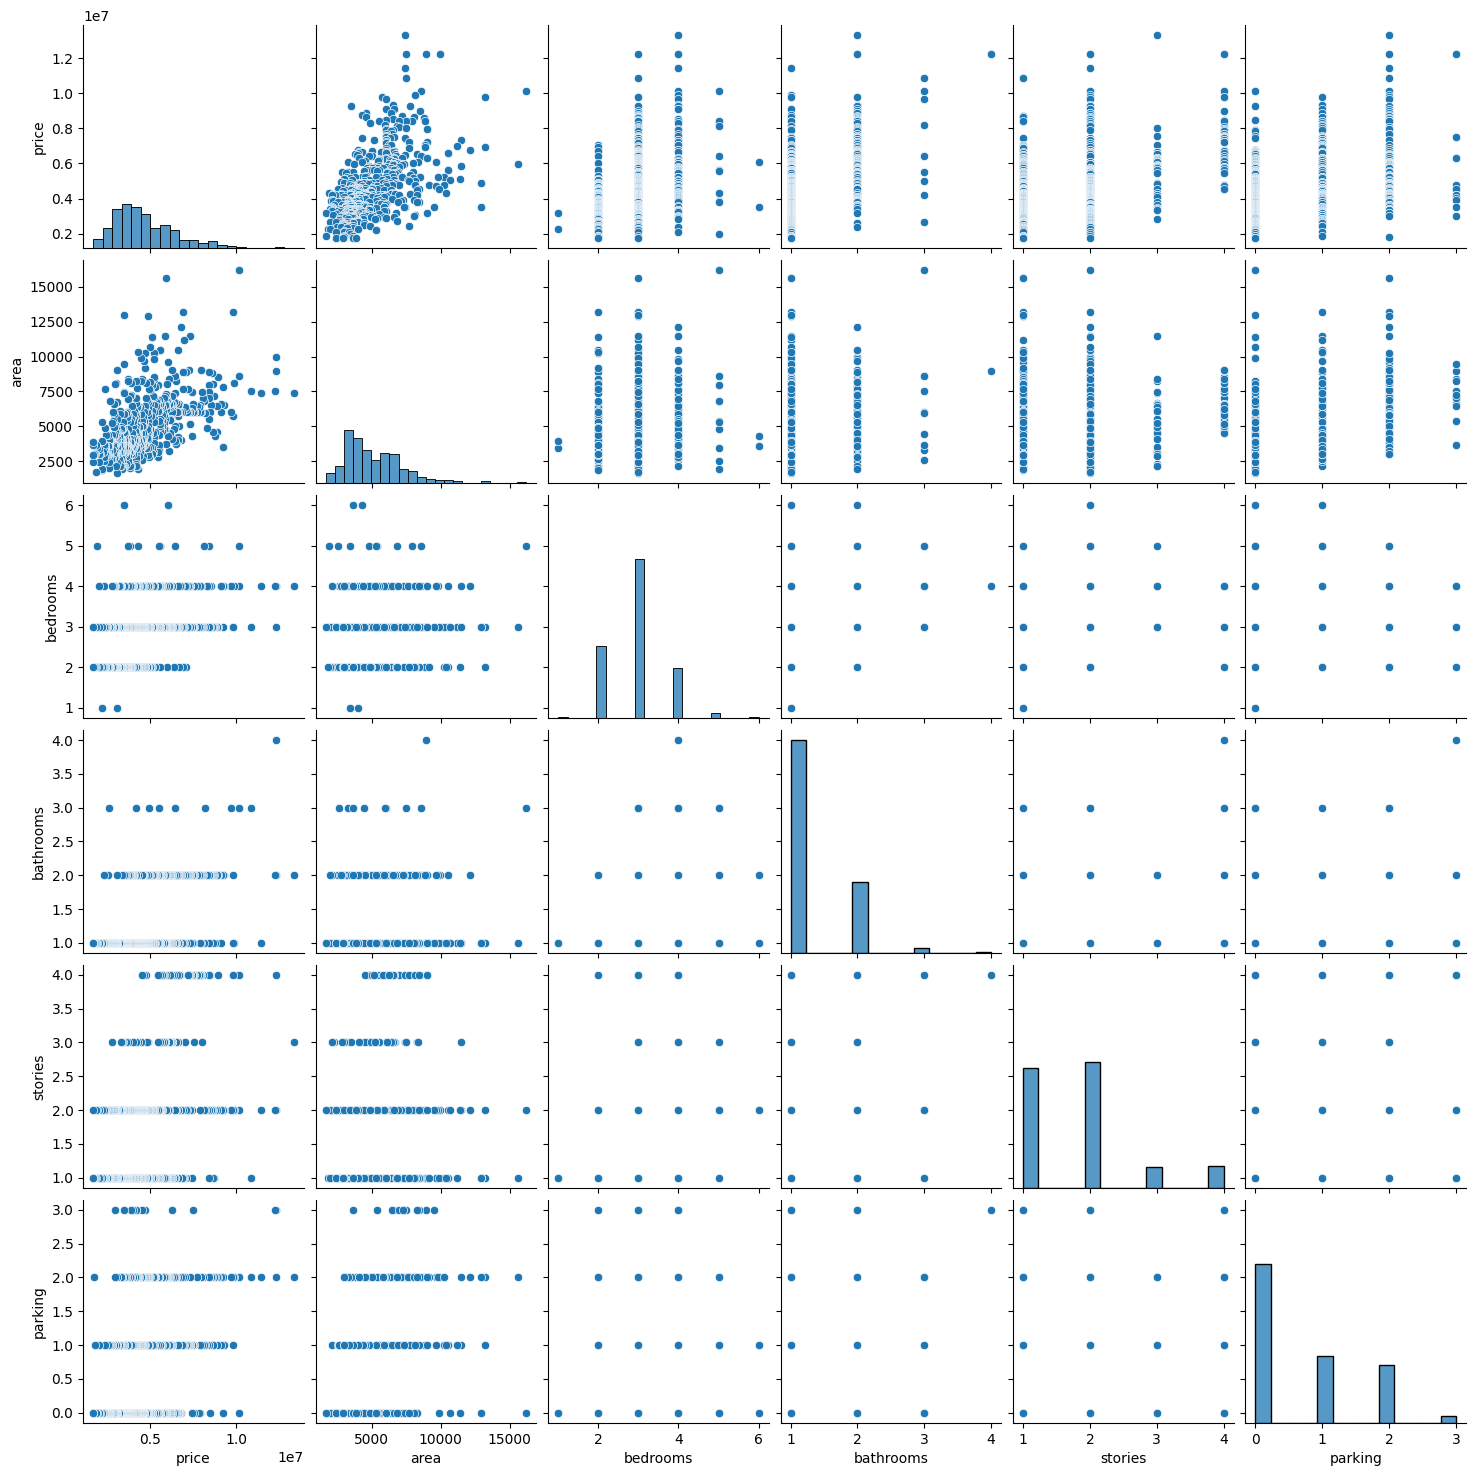

In [102]:
# Pairplot shows relationships between numerical variables.

sns.pairplot(data)
plt.show()

In [103]:
# Test
x = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [104]:
print(X_train.dtypes)

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [105]:
# Machine learning models require numerical data.
# get_dummies() converts categorical values into numerical format.

data_encoded = pd.get_dummies(data, drop_first=True)

print("\nEncoded Dataset Preview:")
display(data_encoded.head())


Encoded Dataset Preview:


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [106]:
# Scaling standardizes features to improve model performance.

# scaler = StandardScaler()

# # The ValueError occurred because X_train and X_test contained categorical strings.
# # Ensuring X_train and X_test are derived from the numerical 'data_encoded' DataFrame.
# # Re-creating x, y, and performing train-test split from data_encoded to ensure numerical input for the scaler.
# x = data_encoded.drop("price", axis=1)
# y = data_encoded["price"]

# # Ensuring train_test_split is available
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# # Fitting scaler on training data and transforming both training and testing data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# print("Scaling applied successfully.")


# Split dataset (KEEP ORIGINAL DATAFRAME VERSION)
# The ValueError occurred because X_train and X_test contained categorical strings.
# Ensuring X_train and X_test are derived from the numerical 'data_encoded' DataFrame.
# Re-creating x, y, and performing train-test split from data_encoded to ensure numerical input for the scaler.

X = data_encoded.drop("price", axis=1)
y = data_encoded["price"]

# Ensuring train_test_split is available
X_train_df, X_test_df, y_train, y_test = train_test_split(X, y, test_size=0.2)
#  random_state=42

# Save column names
feature_names = X_train_df.columns
print(f"{feature_names} \n")

# Apply scaling for training
scaler = StandardScaler()
print(f"{scaler} \n")

X_train = scaler.fit_transform(X_train_df)
print(f"{X_train} \n")

X_test = scaler.transform(X_test_df)
print(f"{X_test} \n")

# train_test_split divides dataset into training and testing sets.
# Training data is used to train the model.
# Testing data is used to evaluate the model.

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes',
       'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object') 

StandardScaler() 

[[ 0.07565383  2.75849648  1.46321388 ... -0.57735027  1.19256959
  -0.70589078]
 [ 0.94159367  0.02196755  1.46321388 ... -0.57735027 -0.83852549
   1.41664976]
 [ 1.38273283  1.39023201 -0.55565084 ... -0.57735027  1.19256959
  -0.70589078]
 ...
 [ 0.39542137  0.02196755 -0.55565084 ... -0.57735027  1.19256959
  -0.70589078]
 [ 0.25304313  0.02196755 -0.55565084 ... -0.57735027  1.19256959
  -0.70589078]
 [ 1.35939213 -1.34629692 -0.55565084 ... -0.57735027 -0.83852549
   1.41664976]] 

[[-0.50786357 -1.34629692 -0.55565084 ...  1.73205081 -0.83852549
   1.41664976]
 [ 1.24268865  0.02196755  1.46321388 ...  1.73205081  1.19256959
  -0.70589078]
 [-0.53587241  0.02196755 -0.55565084 .

In [107]:
print("Training Size:", X_train.shape)
print("Testing Size:", X_test.shape)

# Initializing and training the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr.predict(X_test)

print("Model trained successfully.")

Training Size: (436, 13)
Testing Size: (109, 13)
Model trained successfully.


In [108]:
# MAE = Average absolute difference between actual and predicted values
# MSE = Average squared difference
# RMSE = Square root of MSE (most important metric)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Results:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Model Evaluation Results:
Mean Absolute Error (MAE): 824610.8951841794
Mean Squared Error (MSE): 1209816776058.045
Root Mean Squared Error (RMSE): 1099916.7132369818


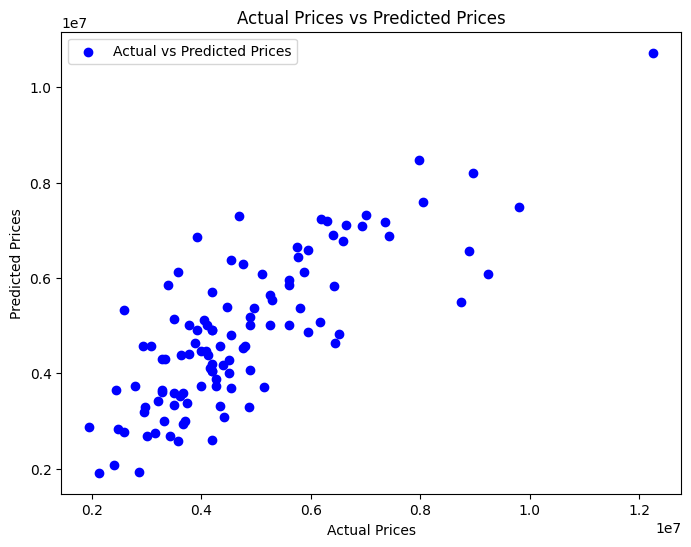

In [109]:
# Scatter plot compares actual prices with predicted prices.

plt.figure(figsize=(8,6))

# Plotting actual prices on x-axis and predicted prices on y-axis
plt.scatter(y_test, y_pred, color = 'blue', label = 'Actual vs Predicted Prices')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.legend()
plt.show()

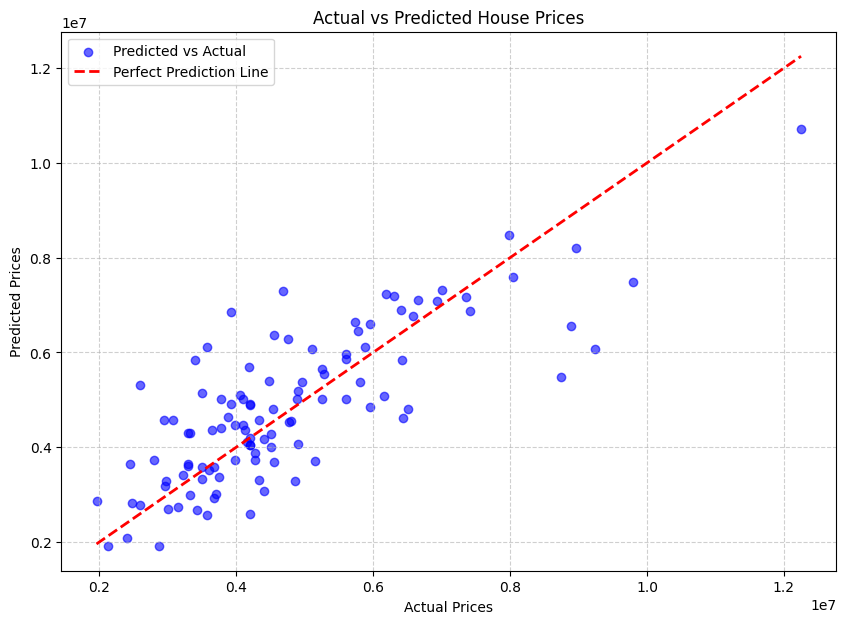

In [110]:
# Scatter plot comparing Actual vs Predicted prices

plt.figure(figsize=(10,7))

# Scatter points
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Predicted vs Actual")

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linestyle='--',
    linewidth=2,
    label="Perfect Prediction Line"
)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

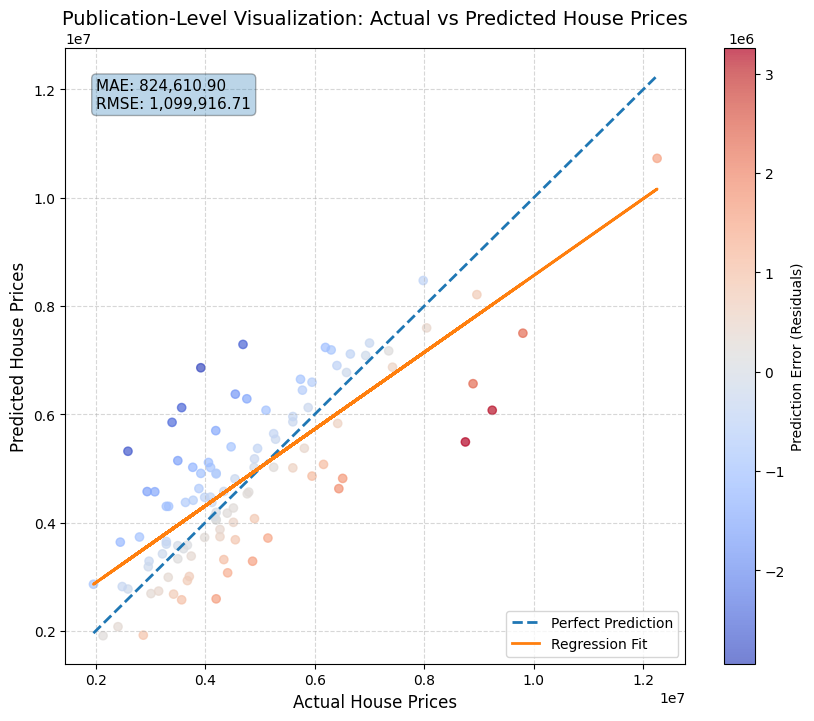

In [111]:
# Publication-quality Actual vs Predicted visualization

plt.figure(figsize=(10,8))

# Calculate residuals for coloring
residuals = y_test - y_pred

# Scatter plot with residual-based coloring
scatter = plt.scatter(
    y_test,
    y_pred,
    c=residuals,
    cmap='coolwarm',
    alpha=0.7
)

# Perfect prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    linewidth=2,
    label="Perfect Prediction",
)

# Fit line (model trend line)
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    linewidth=2,
    label="Regression Fit",
)

# Color bar to show error magnitude
cbar = plt.colorbar(scatter)
cbar.set_label("Prediction Error (Residuals)")

# Labels and title
plt.xlabel("Actual House Prices", fontsize=12)
plt.ylabel("Predicted House Prices", fontsize=12)
plt.title("Publication-Level Visualization: Actual vs Predicted House Prices", fontsize=14)

# Metrics annotation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.text(
    0.05,
    0.95,
    f"MAE: {mae:,.2f}\nRMSE: {rmse:,.2f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle="round", alpha=0.3)
)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

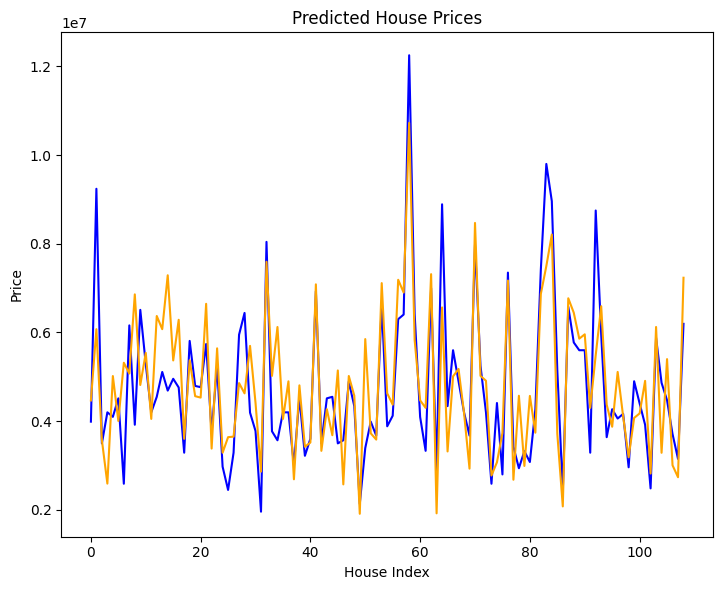

In [112]:
# Visualization of Actual Values and Predicted Values

plt.figure(figsize=(14,6))


# Graph 1: Actual Prices
plt.subplot(1,2,1)

plt.plot(y_test.values, color='blue')

plt.title("Actual House Prices")
plt.xlabel("House Index")
plt.ylabel("Price")


# Graph 2: Predicted Prices
plt.subplot(1,2,1)

plt.plot(y_pred, color='orange')

plt.title("Predicted House Prices")
plt.xlabel("House Index")
plt.ylabel("Price")


plt.tight_layout()
plt.show()

In [116]:
import random

# Randomly select an index from the test set
random_index = random.randint(0, len(X_test_df) - 1)
sample_house_df = X_test_df.iloc[[random_index]]   # keep as DataFrame for scaling

print("House Features:\n")
for column in sample_house_df.columns:
    print(f"{column:<20} {sample_house_df.iloc[0][column]}")

# Scale before prediction
sample_house_scaled = scaler.transform(sample_house_df)

# Predict
predicted_price = lr.predict(sample_house_scaled)[0]

# Get actual price as a scalar
actual_price = y_test.iloc[random_index]

print("\nActual Price:", int(actual_price))
print("Predicted Price:", int(predicted_price))

House Features:

area                 5640
bedrooms             2
bathrooms            1
stories              1
parking              0
mainroad_yes         False
guestroom_yes        False
basement_yes         False
hotwaterheating_yes  False
airconditioning_yes  False
prefarea_yes         False
furnishingstatus_semi-furnished True
furnishingstatus_unfurnished False

Actual Price: 3675000
Predicted Price: 2930617


In [114]:

# Conclusion and Insights:

# 1. Linear Regression was successfully applied to predict house prices.

# 2. Dataset preprocessing included:
#    - Handling categorical variables
#    - Feature selection

# 3. Model performance was evaluated using:
#    - MAE
#    - RMSE

# 4. Scatter plot shows relationship between actual and predicted prices.

# 5. If points lie close to diagonal line, model performance is good.

# 6. Improvements possible:
#    - Feature scaling
#    - Feature selection
#    - Using advanced models like Random Forest or Gradient Boosting

# Final Result:
# Moel successfully predicts house prices based on property features.